In [1]:
import pandas as pd 
import numpy as np 
import math 
import utils 
import seaborn as sns

from IPython.display import Image
from matplotlib import pyplot as plt
from utils import get_distance_speed, get_fathers_sons_outliers, plot_correlation_bargraph 

# this is for grading without showing the answers 
import hashlib
def hash_answer(answer): 
    answer=str(answer)
    return hashlib.sha256((answer).encode()).hexdigest()

In this notebook, you will practice the following:

- Covariance 
- Pearson correlation
- Spearman correlation
- Correlation matrix
- Spurious correlations

# Exercise 1: covariance and correlation with Pandas

Here you will apply what you learned in the Learning Notebook, calculating covariance and correlation on a sample dataset.

We're going to use a dataset of Car Fuel Consumption for this exercise. Source: https://www.kaggle.com/datasets/anderas/car-consume?resource=download. Let's begin by taking a quick look at the dataset:


In [2]:
carride = pd.read_csv('data/carride2.csv')
carride.head()

,distance,consume,speed,temp_outside
0,28.0,5.0,26,12.0
1,12.0,42.0,30,13.0
2,112.0,55.0,38,15.0
3,129.0,39.0,36,14.0
4,185.0,45.0,46,15.0


## 1.1 Are speed and consume related?

We'll begin by checking if the speed is related to the consumption.

Edit the function below so that when given the two features, it returns their covariance, Pearson correlation and Spearman correlation (in this order).


In [3]:
def check_if_related(consume, speed):
    covariance = consume.cov(speed)
    pearson_corr = consume.corr(speed)
    spearman_corr = consume.corr(speed, method='spearman')
    
    return covariance, pearson_corr, spearman_corr

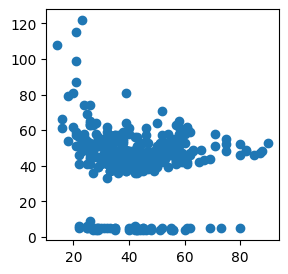

In [4]:
plt.figure(figsize = (3,3))
plt.scatter(carride.speed, carride.consume);

In [5]:
consume, speed = get_distance_speed()
assert math.isclose(check_if_related(consume, speed)[0], -25.061536002557347, abs_tol=0.01), "The covariance seems to be wrong."
assert math.isclose(check_if_related(consume, speed)[1], -0.10365751316032525, abs_tol=0.0001), "The Pearson correlation seems to be wrong."
assert math.isclose(check_if_related(consume, speed)[2], -0.11331148715392869, abs_tol=0.0001), "The Spearman correlation seems to be wrong."
print("Well done! Everything seems in order! The correlation does not seem very significant.")

Well done! Everything seems in order! The correlation does not seem very significant.


## 1.2 Changing units

Now for a thought exercise. Those distances are in feet. Let's assume we want to know the distances in meter.

We know that 1 meter = 3.28 feet, meaning that the meter is a larger unit than the one in this dataset.

If we extract the covariance and Pearson/Spearman correlations again, but this time in meter, which of these statements is true?

    A. The covariance, Pearson correlation and Spearman correlation will decrease.

    B. The covariance will decrease, but the Pearson correlation and Spearman correlation will increase.

    C. The covariance will remain the same, but Pearson correlation and Spearman correlation all decrease.

    D. The covariance will decrease, but Pearson correlation and Spearman correlation will remain the same.

Write the letter corresponding to your chosen answer as a text string into the variable ex1_answer below.




In [6]:
ex1_answer = "D"

In [7]:
assert hash_answer(ex1_answer.lower()) == "18ac3e7343f016890c510e93f935261169d9e3f565436429830faf0934f4f8e4", "Wrong choice. Remember that correlation does not depend on units."
print("Good job!")



Good job!


# Exercise 2: Pearson experiment

The table below gives the heights of fathers and their sons, based on a famous experiment by Karl Pearson around 1903. The number of cases is 1078. Random noise was added to the original data, to produce heights to the nearest 0.1 inch. more info: https://www.kaggle.com/datasets/abhilash04/fathersandsonheight


In [8]:
pearson = pd.read_csv('data/pearson.csv')
pearson.head()

,Fathers,Sons
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


Text(0, 0.5, 'Sons')

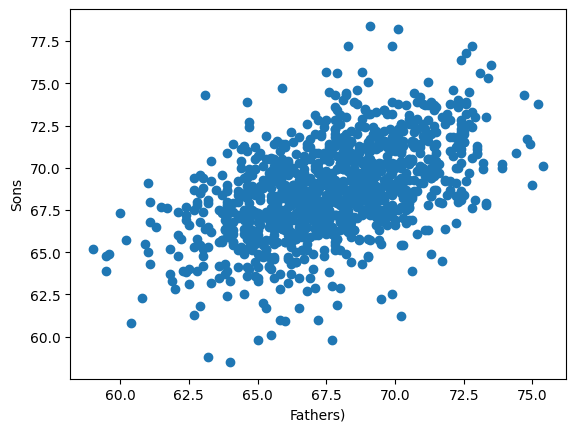

In [9]:
plt.scatter(pearson['Fathers'],pearson['Sons'])
plt.xlabel('Fathers)')
plt.ylabel('Sons')


## 2.1 What can you read from the plot?
What can we infer from the scatter plot above?

    A. There is no correlation between Father and sun.

    B. There is a negative correlation visuable.

    C. There is a positive correlation visuable.

    D. Nothing can be inferred from just the graph.
    
Write the letter corresponding to your chosen answer as a text string into the variable ex2_answer below.


In [10]:
ex2_answer = "C"

In [11]:
assert hash_answer(ex2_answer.lower()) == "2e7d2c03a9507ae265ecf5b5356885a53393a2029d241394997265a1a25aefc6", "Wrong choice. Remember that correlation does not depend on units."
print("Nice!")

Nice!


## 2.2 The outlier

We are going back to analyze those heights.

We adjusted in the dataset some really weird heights or so called outliers. This could be the tallest man ever lifed or giant really exist.  

Adjust the function below to calculate the correlations between the fathers and the sons. Have it return the Pearson correlation and the Spearman correlation, in that order.

Text(0, 0.5, 'Sons')

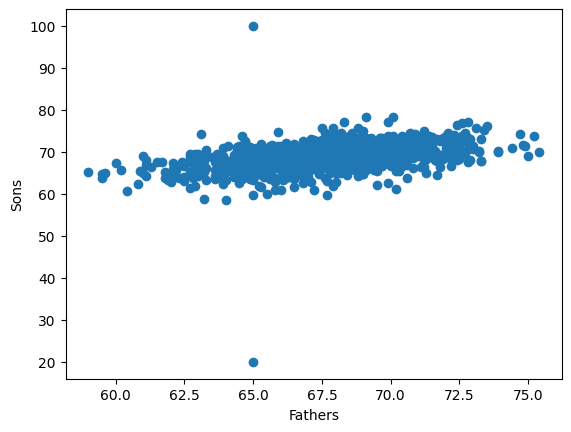

In [12]:
outlier_data = pd.read_csv('data/outlier_data.csv')
plt.scatter(outlier_data['Fathers'],outlier_data['Sons'])
plt.xlabel('Fathers')
plt.ylabel('Sons')

In [13]:
def calculate_correlations_with_pandas(fathers, sons):
    
    pearson_corr = fathers.corr(sons)
    spearman_corr = fathers.corr(sons, method = 'spearman')
    
    return pearson_corr, spearman_corr

Pearson without outlier : 0.5011626808075911
Pearson with outlier    : 0.49940954577534535
Spearman without outlier: 0.5056466119232446
Spearman with outlier   : 0.5036626884981541


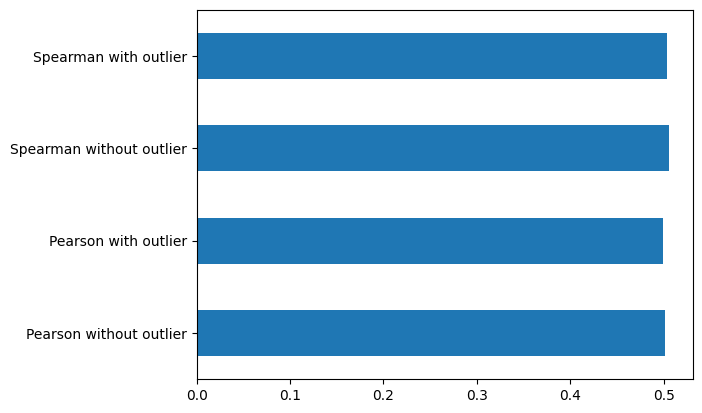

In [14]:
fathers, sons, sons_with_outliers = get_fathers_sons_outliers()

pearson_corr_normal, spearman_corr_normal = calculate_correlations_with_pandas(fathers, sons)
pearson_corr_outlier, spearman_corr_outlier = calculate_correlations_with_pandas(fathers, sons_with_outliers)

# quick plot to see what happens
plot_correlation_bargraph(pearson_corr_normal, pearson_corr_outlier, 
                          spearman_corr_normal, spearman_corr_outlier )

In [15]:
assert math.isclose(abs(pearson_corr_normal - pearson_corr_outlier), 0.002, abs_tol=.001), "The Pearson correlation seems to be off. You should see some change between the two datasets."
assert math.isclose(abs(spearman_corr_normal - spearman_corr_outlier), 0.002, abs_tol=.001), "The Spearman correlation seems to be off. You should see almost no change between the two datasets."
print("So far, so good!")

So far, so good!


## 2.3 What to use when you have outliers?

So, unsurprisingly, the higher the dads are, the higher the sons: a positive correlation. But, as you can see, having outliers may hugely affect your analysis. Then, when dealing with a dataset with outliers, which correlation methodology should you use?

    A. Pearson.

    B. Spearman.

Write the letter corresponding to your chosen answer as a text string into the variable ex3_answer below.

In [16]:
ex3_answer = "B"

In [17]:
assert hash_answer(ex3_answer.lower()) == "3e23e8160039594a33894f6564e1b1348bbd7a0088d42c4acb73eeaed59c009d", "Wrong choice. Look at the changes in the correlations in the bar graphs."
print("Nice! Now you can avoid the data disruption caused by the longest or shortest man ever alive!")

Nice! Now you can avoid the data disruption caused by the longest or shortest man ever alive!


# Exercise 3: Interest in Health issues 

This health search dataset includes an index of volumes of searches for various common medical topics throughout an assortment of areas in the United States. The data covers the period 2004. source: https://www.searching-for-health.com/

Explore the dataset provided below:

- Hint 1: you can use display (<name of df>) to force it to pretty print.
- Hint 2: use the heatmap of the correlation matrix that we used in the learning notebooks.
- Hint 3: you may want to import something to help with the visualization.
- Hint 4: you can either paste the answers or use a purely programmatic solution.
- Hint 5: when we say lowest and highest we mean the sign, not the "magnitude".

In [18]:
health = pd.read_csv('data/health_issue.csv')
health.head()

,cancer,cardiovascular,stroke,depression,rehab,vaccine,diarrhea,obesity,diabetes
0,44,6,17,39,21,31,14,29,38
1,47,6,13,38,16,33,12,27,32
2,48,3,16,50,12,37,24,31,37
3,44,14,14,37,19,49,14,29,31
4,52,7,16,41,23,36,14,30,37


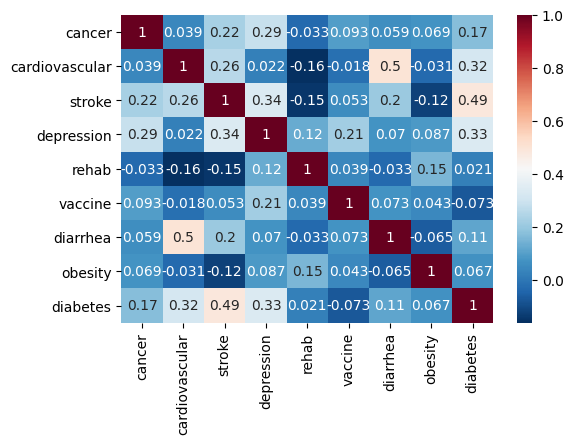

In [19]:
health_matrix = health.corr()

plt.figure(figsize = (6,4))
sns.heatmap(health_matrix, annot=True, cmap='RdBu_r');

In [20]:
health.vaccine.corr(health.stroke, method = 'spearman')

0.18789679179601962

In [21]:
# Complete the following questions 

# Q1: What is the pair of healthissues with the most negative Pearson correlation? 
# (pass the answer as a list, and remember, you can just type it in, no fancy Pandas needed) 
health_pair_with_lowest_pearson_corr =  ["rehab", "cardiovascular"]

# # Q2: What is the healthissue with the most negative pearson correlation with Obesity? 
# (the answer is a string)
health_rank_pearson_corr_with_obesity = "stroke"


# Q3: What is the Spearman correlation between vaccine and stroke? 
# (answer is a float, use two decimal spaces)
spearman_corr_between_vaccine_and_stroke = 0.19

# Q4: Observe the top 6 Pearson correlation pairs, and then look at the general correlation matrix. 
# Is there one health issue that seems highly related to most other healthissues? 
# Which confounding variable is it?
possible_confounding_variable = "diabetes"


In [22]:

assert hash_answer(sorted(health_pair_with_lowest_pearson_corr)[0].lower()) == "4bb237c1191f109fd0899e69bf015cae2920af32588512a5def831d74e263b41", "That is not the pair with the lowest pearson correlation."
assert hash_answer(sorted(health_pair_with_lowest_pearson_corr)[1].lower()) == "939bb889c999330525d525d62ad19cdd352928d1d79e9bddc2f88033220675c3", "That is not the pair with the lowest pearson correlation."
assert hash_answer(health_rank_pearson_corr_with_obesity.lower()) == "1ba7573640bbbb13a9e25d5b6946b560307af27e6c9cd040840583b186d280b5", "That is not it"
assert math.isclose(spearman_corr_between_vaccine_and_stroke, 0.19, abs_tol=0.01), "Wrong spearman correlation value between vaccine and stroke."
assert hash_answer(possible_confounding_variable.lower()) == "6a5d28d69b8b05a62caeaf6e6908402d26edf8fd2935e55ba687cbcf205ddc2f", "Let's check again"

print("You got it!")


You got it!


# Exercise 4: lots of stocks
You were hired by a hedge fund, because money. 

On the first day, your boss, Greedy McRiskyface asked you to select one stock pair. He wants the two stocks to be as uncorrelated as possible (use Pearson), so that he can short one and long the other. 

The answer should be (1) the two stocks, as a list and (2) their Pearson correlation, as a float. 

In [23]:
stock_data = utils.get_stocks_data_2()

In [31]:
stock_data_matrix = stock_data.corr()

triangle_mask = np.triu(np.ones(stock_data_matrix.shape)).astype(np.bool)
stock_data_matrix_lower = stock_data_matrix.mask(triangle_mask)

stock_data_matrix_unstack = stock_data_matrix_lower.unstack().dropna()
stock_data_matrix_unstack.nlargest(1)

/tmp/ipykernel_260/3756518523.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  triangle_mask = np.triu(np.ones(stock_data_matrix.shape)).astype(np.bool)


LLZ  GGR    0.424578
dtype: float64

In [32]:
most_correlated_pair = ["LLZ", "GGR"]
most_correlated_pair_value = 0.4246

In [33]:
assert isinstance(most_correlated_pair, list), "the most correlated pair is not a list"
assert len(most_correlated_pair) == 2, "the length of the most correlated pair list is not 2"
assert math.isclose(most_correlated_pair_value, 0.4, abs_tol=0.2),"The value is not correct."
utils.dirty_little_secret()


    Ok, we tricked you, and it was unfair of us.

    The reality is that this stock dataset was 100% RANDOM NUMBERS.

    The thing to remember is: if you use correlation without knowing the data, you are always going to find "something".
    A lot of bad data science comes from over trusting the tools without knowing the data.

    If you have enough data and dig into it using correlation you will ALWAYS find something
    ... even if there is nothing to be found.

    Correlation does not equal causality.
    And sometimes, it just means you found a signal where there was only noise.

    Now go on to the next SLU, and remember the day you modeled random numbers and found good stock picks :)
    
